In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.stats as st

In [2]:
csv_data=pd.read_csv("smmh.csv")
clean_data_df=pd.DataFrame(csv_data)


In [3]:
# add ID column
clean_data_df.insert(0,"ID_number",range(1,len(clean_data_df)+1))


In [4]:
# rename columns
clean_data_df.columns =['ID_number', 'timestamp', 'age', 'gender', 'relationship_status', 'occupation_status', 'org_affiliations', 'use_social_media', 'SM_list', 'avg_time_per_day',
                  'how_often_use_sm_without_purpose', 'how_often_distracted_by_sm', 'feel_restless_wo_sm', 'how_easily_distracted', 'bothered_by_worries', 'difficult_to_concentrate',
                  'compare_self_to_others', 'feel_about_comparisons', 'seek_validation', 'feel_depressed', 'interest_in_daily_activ', 'sleep_issues']


In [5]:
# separate social media networks
clean_data_df.insert(9,"facebook",clean_data_df['SM_list'].str.contains("Facebook").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(10,"twitter",clean_data_df['SM_list'].str.contains("Twitter").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(11,"instagram",clean_data_df['SM_list'].str.contains("Instagram").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(12,"youtube",clean_data_df['SM_list'].str.contains("YouTube").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(13,"snapchat",clean_data_df['SM_list'].str.contains("Snapchat").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(14,"discord",clean_data_df['SM_list'].str.contains("Discord").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(15,"reddit",clean_data_df['SM_list'].str.contains("Reddit").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(16,"pinterest",clean_data_df['SM_list'].str.contains("Pinterest").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(17,"tiktok",clean_data_df['SM_list'].str.contains("TikTok").map({True: 'Yes', False: 'No'}))
clean_data_df=clean_data_df.drop("SM_list",axis=1)


In [6]:
#adding SM count
clean_data_df.insert(17,"platform_count",clean_data_df[["facebook","twitter","instagram","youtube","snapchat","discord","reddit","pinterest","tiktok"]].eq("Yes").sum(axis=1))


In [7]:
# making avg time/day easier to read
clean_data_df["avg_time_per_day"]=clean_data_df["avg_time_per_day"].replace({"Less than an Hour":"0-1","Between 1 and 2 hours":"1-2","Between 2 and 3 hours":"2-3","Between 3 and 4 hours":"3-4",
                                                                             "Between 4 and 5 hours":"4-5","More than 5 hours":"5+"})


In [8]:
# clean up gender (non-binary) responses
clean_data_df["gender"]=clean_data_df["gender"].replace({"Nonbinary ":"Non-binary","NB":"Non-binary","unsure ":"Non-binary","Non binary ":"Non-binary",
                                                                             "There are others???":"Non-binary"})

In [9]:
# aggregating construct scores
clean_data_df["depression_construct"]=clean_data_df["feel_depressed"]+clean_data_df["interest_in_daily_activ"]+clean_data_df["bothered_by_worries"]
clean_data_df["inattentive_construct"]=clean_data_df["how_easily_distracted"]+clean_data_df["difficult_to_concentrate"]+clean_data_df["how_often_distracted_by_sm"]
clean_data_df["valid_seek_construct"]=clean_data_df["compare_self_to_others"]+clean_data_df["feel_about_comparisons"]+clean_data_df["seek_validation"]


In [10]:
# drop 91 yo - extreme outlier, likely typo
clean_data_df=clean_data_df[clean_data_df["age"] < 75]


In [11]:
clean_data_df.to_csv("survey_data_cleaned.csv",index=False)

In [12]:
# read in csv
csv_data=pd.read_csv("survey_data_cleaned.csv")
data_df=pd.DataFrame(csv_data)

data_df.head()

,ID_number,timestamp,age,gender,relationship_status,occupation_status,org_affiliations,use_social_media,facebook,twitter,...,difficult_to_concentrate,compare_self_to_others,feel_about_comparisons,seek_validation,feel_depressed,interest_in_daily_activ,sleep_issues,depression_construct,inattentive_construct,valid_seek_construct
0,1,4/18/2022 19:18,21.0,Male,In a relationship,University Student,University,Yes,Yes,Yes,...,5,2,3,2,5,4,5,11,13,7
1,2,4/18/2022 19:19,21.0,Female,Single,University Student,University,Yes,Yes,Yes,...,4,5,1,1,5,4,5,14,11,7
2,3,4/18/2022 19:25,21.0,Female,Single,University Student,University,Yes,Yes,No,...,4,3,3,1,4,2,5,11,8,7
3,4,4/18/2022 19:29,21.0,Female,Single,University Student,University,Yes,Yes,No,...,3,5,1,2,4,3,2,12,8,8
4,5,4/18/2022 19:33,21.0,Female,Single,University Student,University,Yes,Yes,No,...,5,3,3,3,4,4,1,13,14,9


depression construct: correlation is -0.37978980364485715
inattentive construct: correlation is -0.31377089383931533
validation seeking construct: correlation is -0.08226522421476642


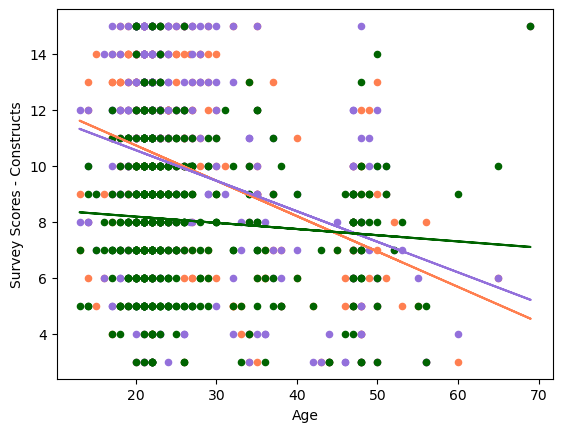

In [13]:
# mental health outcomes (interest in daily activities, compare yourself to others, seeking validation) by age

# mh construct scores by age
dep = data_df.plot.scatter("age","depression_construct", color="coral")
inatt = data_df.plot.scatter("age","inattentive_construct", color="mediumpurple",ax=dep)
validseek= data_df.plot.scatter("age","valid_seek_construct", color="darkgreen",ax=dep)
# plt.legend([dep,inatt,validseek],["Depression Construct","Inattentive Construct","Validation Seeking Construct"])
plt.xlabel("Age")
plt.ylabel("Survey Scores - Constructs")

# regression lines
(d_slope,d_intercept,d_rvalue,d_pvalue,d_sterr)=st.linregress(data_df["age"],data_df["depression_construct"])
d_regress_vals=data_df["age"]*d_slope+d_intercept
plt.plot(data_df["age"],d_regress_vals,"coral")

(i_slope,i_intercept,i_rvalue,i_pvalue,i_sterr)=st.linregress(data_df["age"],data_df["inattentive_construct"])
i_regress_vals=data_df["age"]*i_slope+i_intercept
plt.plot(data_df["age"],i_regress_vals,"mediumpurple")

(v_slope,v_intercept,v_rvalue,v_pvalue,v_sterr)=st.linregress(data_df["age"],data_df["valid_seek_construct"])
v_regress_vals=data_df["age"]*v_slope+v_intercept
plt.plot(data_df["age"],v_regress_vals,"darkgreen")

print(f"depression construct: correlation is {d_rvalue}")
print(f"inattentive construct: correlation is {i_rvalue}")
print(f"validation seeking construct: correlation is {v_rvalue}")
plt.savefig("output/mj_score_by_age.png", bbox_inches='tight')
plt.show()

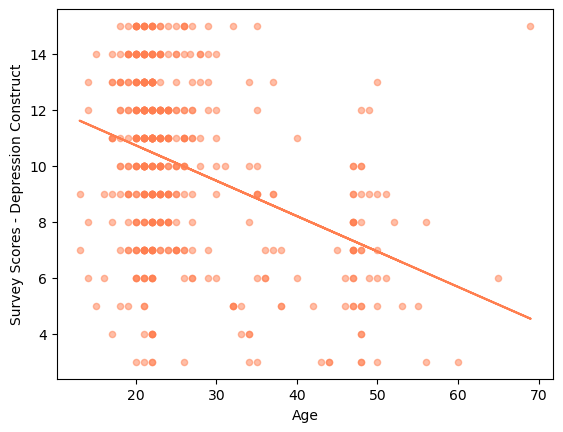

In [14]:
dep = data_df.plot.scatter("age","depression_construct", color="coral",alpha=.5)
plt.xlabel("Age")
plt.ylabel("Survey Scores - Depression Construct")
(d_slope,d_intercept,d_rvalue,d_pvalue,d_sterr)=st.linregress(data_df["age"],data_df["depression_construct"])
d_regress_vals=data_df["age"]*d_slope+d_intercept
plt.plot(data_df["age"],d_regress_vals,"coral")
plt.show()


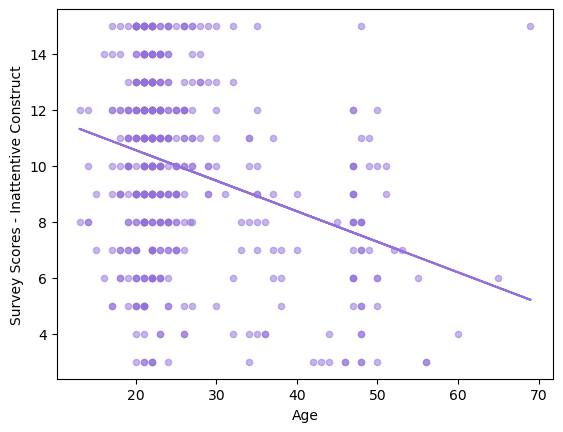

In [15]:
inatt = data_df.plot.scatter("age","inattentive_construct", color="mediumpurple",alpha=.5)
plt.xlabel("Age")
plt.ylabel("Survey Scores - Inattentive Construct")
(i_slope,i_intercept,i_rvalue,i_pvalue,i_sterr)=st.linregress(data_df["age"],data_df["inattentive_construct"])
i_regress_vals=data_df["age"]*i_slope+i_intercept
plt.plot(data_df["age"],i_regress_vals,"mediumpurple")
plt.show()


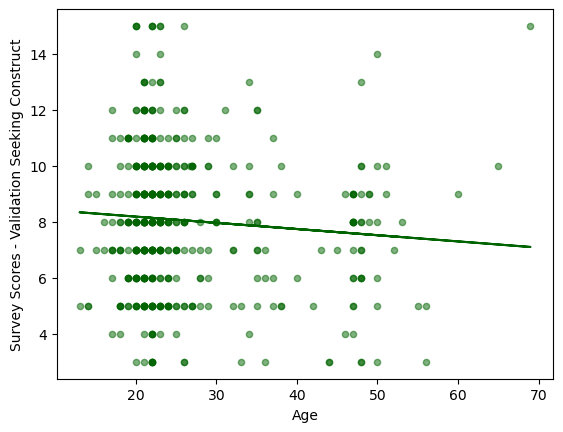

In [16]:
validseek= data_df.plot.scatter("age","valid_seek_construct", color="darkgreen",alpha=.5)
plt.xlabel("Age")
plt.ylabel("Survey Scores - Validation Seeking Construct")
(v_slope,v_intercept,v_rvalue,v_pvalue,v_sterr)=st.linregress(data_df["age"],data_df["valid_seek_construct"])
v_regress_vals=data_df["age"]*v_slope+v_intercept
plt.plot(data_df["age"],v_regress_vals,"darkgreen")
plt.show()


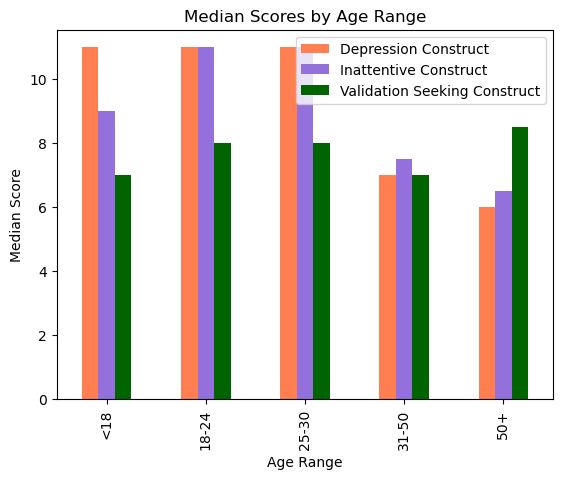

In [17]:
# age bins
age_bins = [0, 18, 24, 30, 50, 92]
age_bin_labels = ["<18", "18-24", "25-30", "31-50", "50+"]

# add bins column to df
age_df=data_df.copy()
age_df["age_range"]=pd.cut(age_df["age"],age_bins, labels=age_bin_labels, include_lowest=True)

age_df=age_df.groupby("age_range",observed=False)

# plot scores by age range
new_age_df=pd.DataFrame(age_df.median(numeric_only=True))
new_age_df=new_age_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})
new_age_df[["Depression Construct","Inattentive Construct","Validation Seeking Construct"]].plot.bar(color=["coral","mediumpurple","darkgreen"],
                                                                           xlabel="Age Range",ylabel="Median Score",title="Median Scores by Age Range")
plt.show()

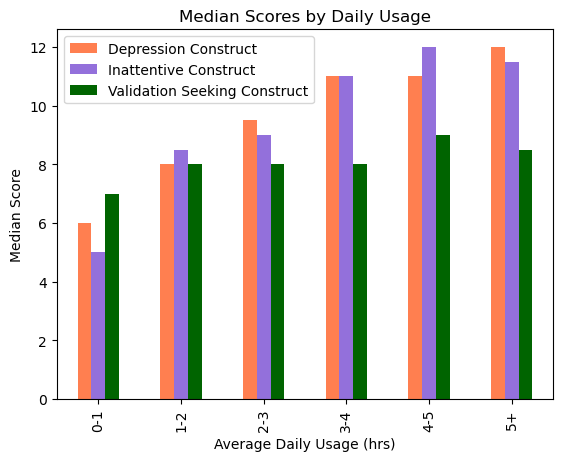

In [18]:
# making avg time/day easier to read - this is now done in cleanup section
# data_df["avg_time_per_day"]=data_df["avg_time_per_day"].replace({"Less than an Hour":"0-1","Between 1 and 2 hours":"1-2","Between 2 and 3 hours":"2-3","Between 3 and 4 hours":"3-4",
#                                                                  "Between 4 and 5 hours":"4-5","More than 5 hours":"5+"})

hrs_df=data_df.groupby("avg_time_per_day",observed=False)

hrs_df=pd.DataFrame(hrs_df.median(numeric_only=True))
hrs_df=hrs_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

hrs_df[["Depression Construct","Inattentive Construct","Validation Seeking Construct"]].plot.bar(color=["coral","mediumpurple","darkgreen"],
                                                                           xlabel="Average Daily Usage (hrs)",ylabel="Median Score",title="Median Scores by Daily Usage")
plt.savefig("output/mj_usage_scores.png", bbox_inches='tight')
plt.show()

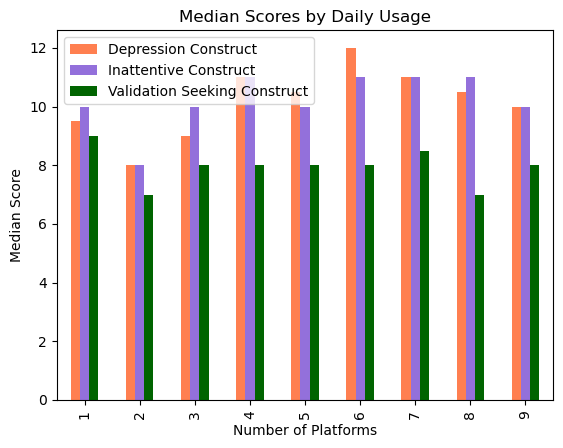

In [19]:
# #adding SM count - this is now done in cleanup section
# data_df["sm_count"]=data_df[["facebook","twitter","instagram","youtube","snapchat","discord","reddit","pinterest","tiktok"]].eq("Yes").sum(axis=1)

sm_df=data_df.groupby("platform_count",observed=False)


sm_df=pd.DataFrame(sm_df.median(numeric_only=True))
sm_df=sm_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_df[["Depression Construct","Inattentive Construct","Validation Seeking Construct"]].plot.bar(color=["coral","mediumpurple","darkgreen"],
                                                                           xlabel="Number of Platforms",ylabel="Median Score",title="Median Scores by Daily Usage")

plt.show()

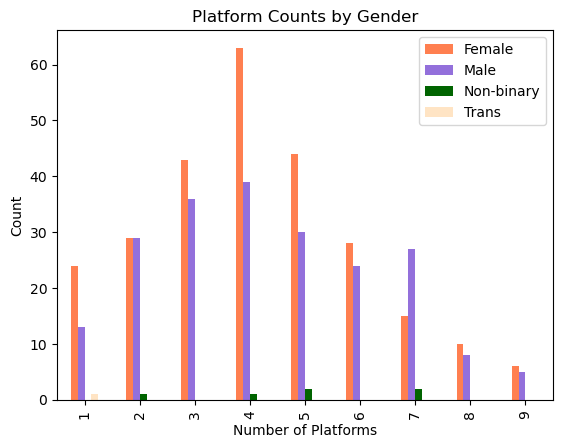

In [20]:
plat_count_df=pd.DataFrame({"Female":data_df[data_df["gender"]=="Female"].groupby("platform_count",observed=False).count()["ID_number"],
                            "Male":data_df[data_df["gender"]=="Male"].groupby("platform_count",observed=False).count()["ID_number"],
                           "Non-binary":data_df[data_df["gender"]=="Non-binary"].groupby("platform_count",observed=False).count()["ID_number"],
                           "Trans":data_df[data_df["gender"]=="Trans"].groupby("platform_count",observed=False).count()["ID_number"]})
plat_count_df=plat_count_df.fillna(0)
plat_count_df.plot.bar(color=["coral","mediumpurple","darkgreen","bisque"], xlabel="Number of Platforms",ylabel="Count",title="Platform Counts by Gender")
plt.show()

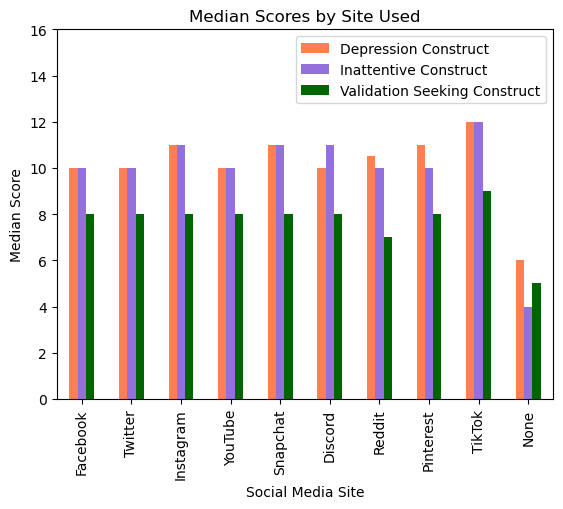

In [21]:
sm_med_df=pd.DataFrame({"Facebook":data_df[data_df["facebook"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Twitter":data_df[data_df["twitter"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Instagram":data_df[data_df["instagram"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "YouTube":data_df[data_df["youtube"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Snapchat":data_df[data_df["snapchat"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Discord":data_df[data_df["discord"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Reddit":data_df[data_df["reddit"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Pinterest":data_df[data_df["pinterest"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "TikTok":data_df[data_df["tiktok"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "None":data_df[data_df["use_social_media"]=="No"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True)})
sm_med_df=sm_med_df.T
sm_med_df=sm_med_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_avg_df=pd.DataFrame({"Facebook":data_df[data_df["facebook"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Twitter":data_df[data_df["twitter"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Instagram":data_df[data_df["instagram"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "YouTube":data_df[data_df["youtube"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Snapchat":data_df[data_df["snapchat"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Discord":data_df[data_df["discord"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Reddit":data_df[data_df["reddit"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Pinterest":data_df[data_df["pinterest"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "TikTok":data_df[data_df["tiktok"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "None":data_df[data_df["use_social_media"]=="No"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True)})
sm_avg_df=sm_avg_df.T

sm_avg_df=sm_avg_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_med_df.plot.bar(color=["coral","mediumpurple","darkgreen"],xlabel="Social Media Site",ylabel="Median Score",title="Median Scores by Site Used",ylim=(0,16))

plt.savefig("output/mj_site_scores_all.png", bbox_inches='tight')
plt.show()

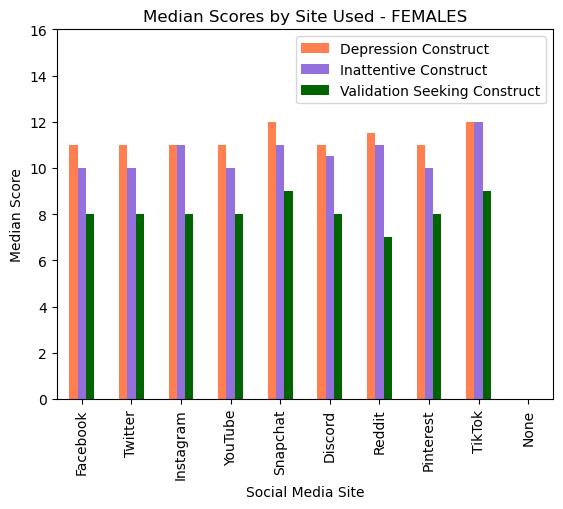

In [22]:
# FEMALES
sm_med_df=pd.DataFrame({"Facebook":data_df[(data_df["facebook"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Twitter":data_df[(data_df["twitter"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Instagram":data_df[(data_df["instagram"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "YouTube":data_df[(data_df["youtube"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Snapchat":data_df[(data_df["snapchat"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Discord":data_df[(data_df["discord"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Reddit":data_df[(data_df["reddit"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Pinterest":data_df[(data_df["pinterest"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "TikTok":data_df[(data_df["tiktok"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "None":data_df[(data_df["use_social_media"]=="No")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True)})
sm_med_df=sm_med_df.T
sm_med_df=sm_med_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_avg_df=pd.DataFrame({"Facebook":data_df[(data_df["facebook"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Twitter":data_df[(data_df["twitter"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Instagram":data_df[(data_df["instagram"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "YouTube":data_df[(data_df["youtube"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Snapchat":data_df[(data_df["snapchat"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Discord":data_df[(data_df["discord"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Reddit":data_df[(data_df["reddit"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Pinterest":data_df[(data_df["pinterest"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "TikTok":data_df[(data_df["tiktok"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "None":data_df[(data_df["use_social_media"]=="No")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True)})
sm_avg_df=sm_avg_df.T

sm_avg_df=sm_avg_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_med_df.plot.bar(color=["coral","mediumpurple","darkgreen"],xlabel="Social Media Site",ylabel="Median Score",title="Median Scores by Site Used - FEMALES",ylim=(0,16))
plt.savefig("output/mj_site_scores_f.png", bbox_inches='tight')
plt.show()

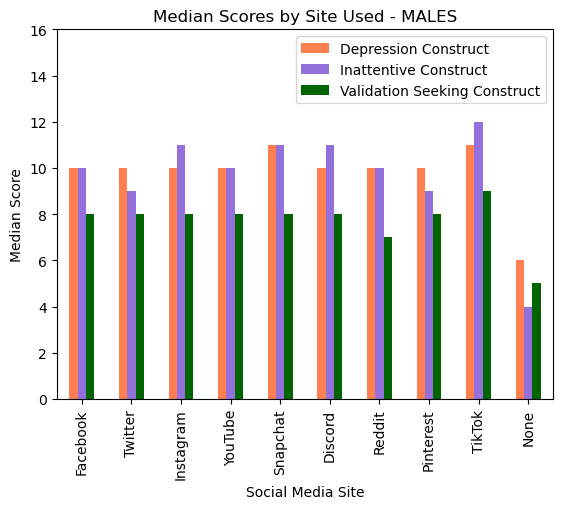

In [23]:
# MALES
sm_med_df=pd.DataFrame({"Facebook":data_df[(data_df["facebook"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Twitter":data_df[(data_df["twitter"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Instagram":data_df[(data_df["instagram"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "YouTube":data_df[(data_df["youtube"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Snapchat":data_df[(data_df["snapchat"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Discord":data_df[(data_df["discord"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Reddit":data_df[(data_df["reddit"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Pinterest":data_df[(data_df["pinterest"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "TikTok":data_df[(data_df["tiktok"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "None":data_df[(data_df["use_social_media"]=="No")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True)})
sm_med_df=sm_med_df.T
sm_med_df=sm_med_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_avg_df=pd.DataFrame({"Facebook":data_df[(data_df["facebook"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Twitter":data_df[(data_df["twitter"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Instagram":data_df[(data_df["instagram"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "YouTube":data_df[(data_df["youtube"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Snapchat":data_df[(data_df["snapchat"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Discord":data_df[(data_df["discord"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Reddit":data_df[(data_df["reddit"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Pinterest":data_df[(data_df["pinterest"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "TikTok":data_df[(data_df["tiktok"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "None":data_df[(data_df["use_social_media"]=="No")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True)})
sm_avg_df=sm_avg_df.T

sm_avg_df=sm_avg_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_med_df.plot.bar(color=["coral","mediumpurple","darkgreen"],xlabel="Social Media Site",ylabel="Median Score",title="Median Scores by Site Used - MALES",ylim=(0,16))
plt.savefig("output/mj_site_scores_m.png", bbox_inches='tight')
plt.show()

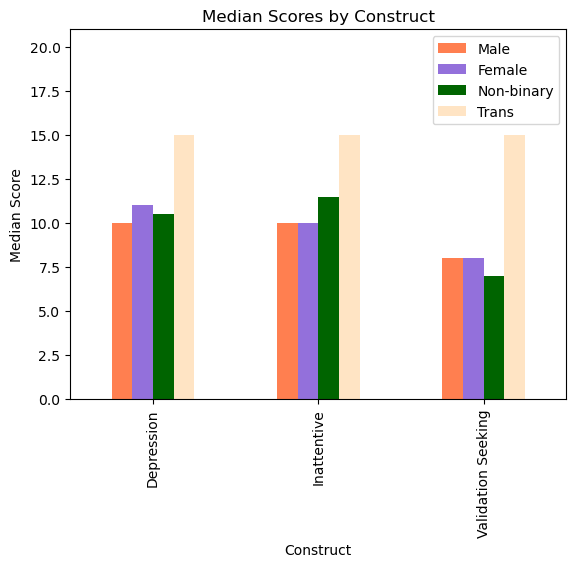

In [24]:
gender_construct_df=pd.DataFrame({"Male":data_df[data_df["gender"]=="Male"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Female":data_df[data_df["gender"]=="Female"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Non-binary":data_df[data_df["gender"]=="Non-binary"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Trans":data_df[data_df["gender"]=="Trans"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True)})
gender_construct_df=gender_construct_df.rename(index={"depression_construct":"Depression","inattentive_construct":"Inattentive","valid_seek_construct":"Validation Seeking"})
gender_construct_df.plot.bar(color=["coral","mediumpurple","darkgreen","bisque"],xlabel="Construct",ylabel="Median Score",title="Median Scores by Construct",ylim=(0,21))
plt